# **Load Packages**

In [64]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
pip install mlxtend --upgrade --no-deps

# **Loading the Data**

Loading the excel file

In [3]:
train_data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
train_data.head()

Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0  28395    610.291       208.178117  ...      0.834222      0.998724  SEKER
1  28734    638.018       200.524796  ...      0.909851      0.998430  SEKER
2  29380    624.110       212.826130  ...      0.825871      0.999066  SEKER
3  30008    645.884       210.557999  ...      0.861794      0.994199  SEKER
4  30140    620.134       201.847882  ...      0.941900      0.999166  SEKER

[5 rows x 17 columns]

In [4]:
train_data.shape

(13611, 17)

In [5]:
train_data['Class'].nunique()

7

# **Exploring the Data**

Calculate and plot the correlation matrix  between features

In [6]:
x = train_data.iloc[:,:-1]

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [8]:
x.describe()

Area     Perimeter  ...  ShapeFactor3  ShapeFactor4
count   13611.000000  13611.000000  ...  13611.000000  13611.000000
mean    53048.284549    855.283459  ...      0.643590      0.995063
std     29324.095717    214.289696  ...      0.098996      0.004366
min     20420.000000    524.736000  ...      0.410339      0.947687
25%     36328.000000    703.523500  ...      0.581359      0.993703
50%     44652.000000    794.941000  ...      0.642044      0.996386
75%     61332.000000    977.213000  ...      0.696006      0.997883
max    254616.000000   1985.370000  ...      0.974767      0.999733

[8 rows x 16 columns]

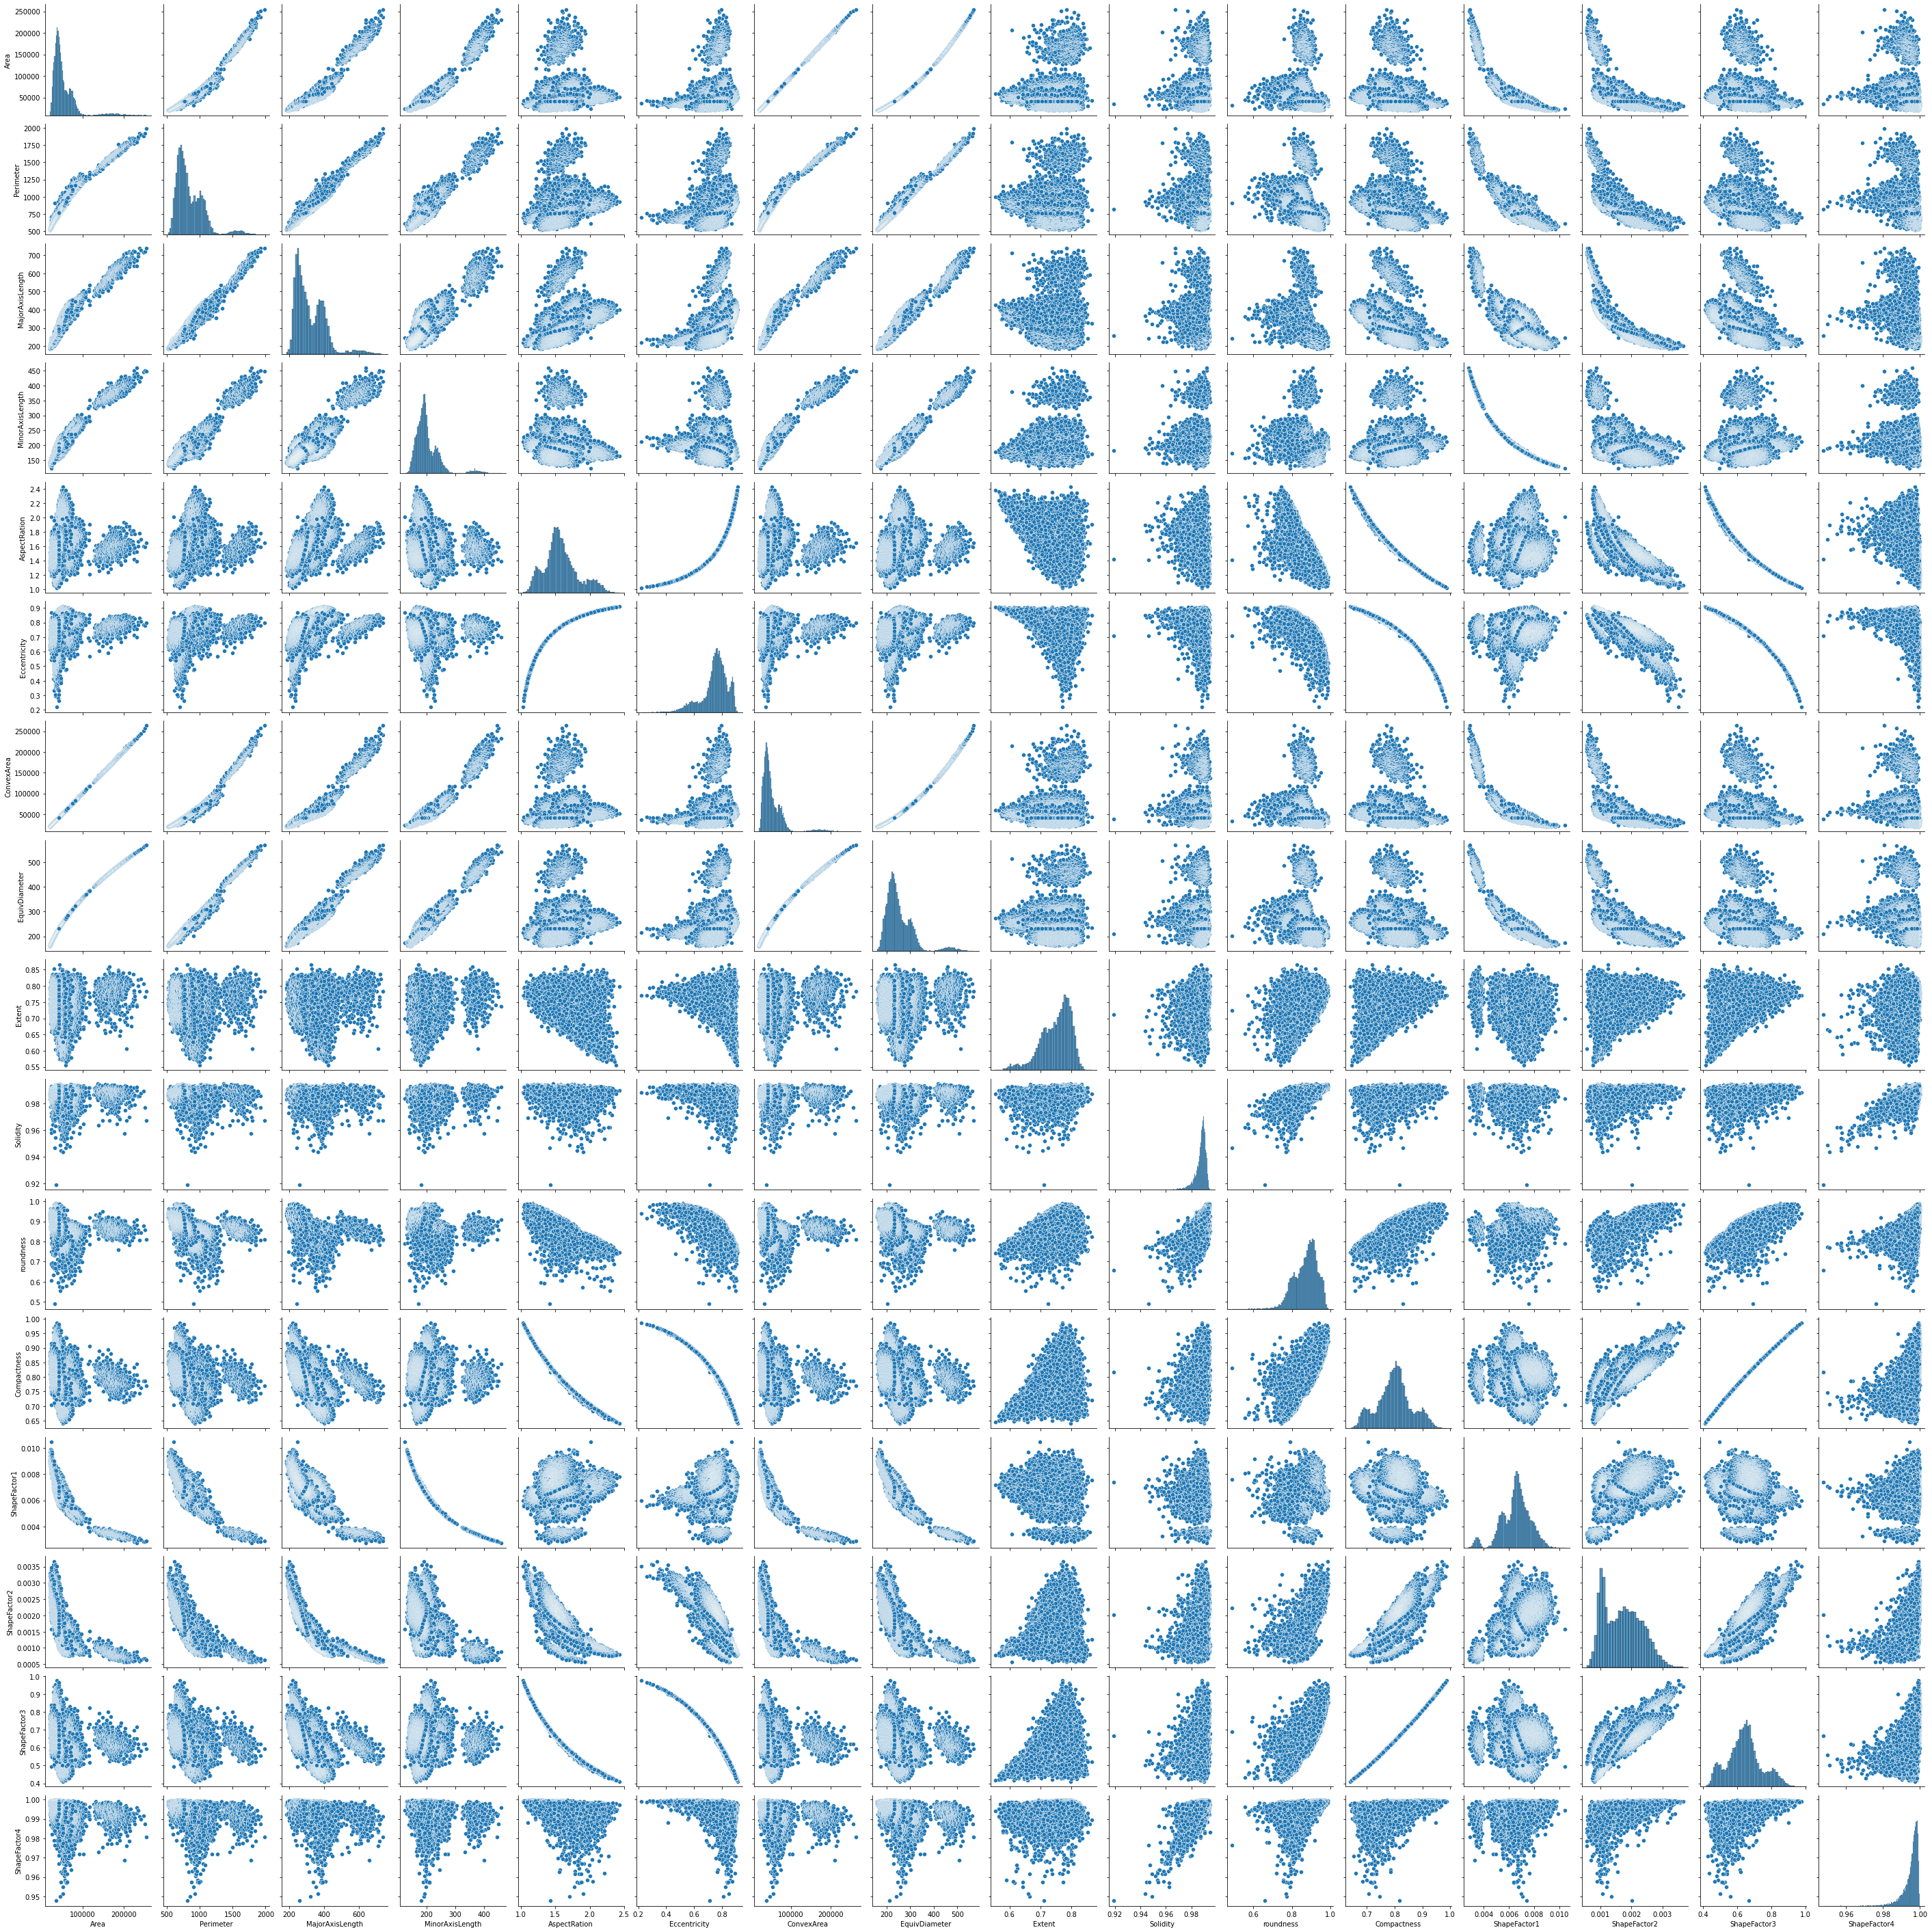

In [9]:
sns.pairplot(x)

It is looking a bit messy but there are two insights that we get

  1. There are some graphs which are nearly a straight line which means there are some highly correlated features
  2. Along the diagnal are the distrubutions of features and we see there are some very skewed graphs

Now we'll separately analyse the correlations and distributions and draw conclusions from them

**Analyzing Correlations**

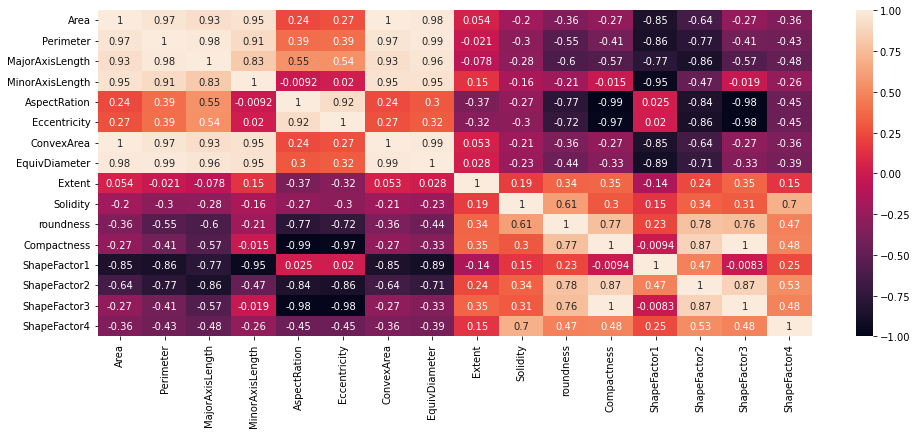

In [10]:
x.corr
plt.figure(figsize=(16, 6))
sns_plot = sns.heatmap(x.corr(), vmin=-1, vmax=1, annot=True)

plt.show()
figure = sns_plot.get_figure()    
figure.savefig('corr.png', dpi=400)

From the above some linear pairplot and correlation matrix there are some corelation which are too correalte to each other. So we drop that features which have correlation coefficient greater than 0.95.

In [11]:
data = train_data.drop(columns=['Perimeter', 'ConvexArea', 'EquivDiameter', 'Compactness'])

In [12]:
data

Area  MajorAxisLength  ...  ShapeFactor4     Class
0      28395       208.178117  ...      0.998724     SEKER
1      28734       200.524796  ...      0.998430     SEKER
2      29380       212.826130  ...      0.999066     SEKER
3      30008       210.557999  ...      0.994199     SEKER
4      30140       201.847882  ...      0.999166     SEKER
...      ...              ...  ...           ...       ...
13606  42097       288.721612  ...      0.998385  DERMASON
13607  42101       281.576392  ...      0.998219  DERMASON
13608  42139       281.539928  ...      0.996767  DERMASON
13609  42147       283.382636  ...      0.995222  DERMASON
13610  42159       295.142741  ...      0.998180  DERMASON

[13611 rows x 13 columns]

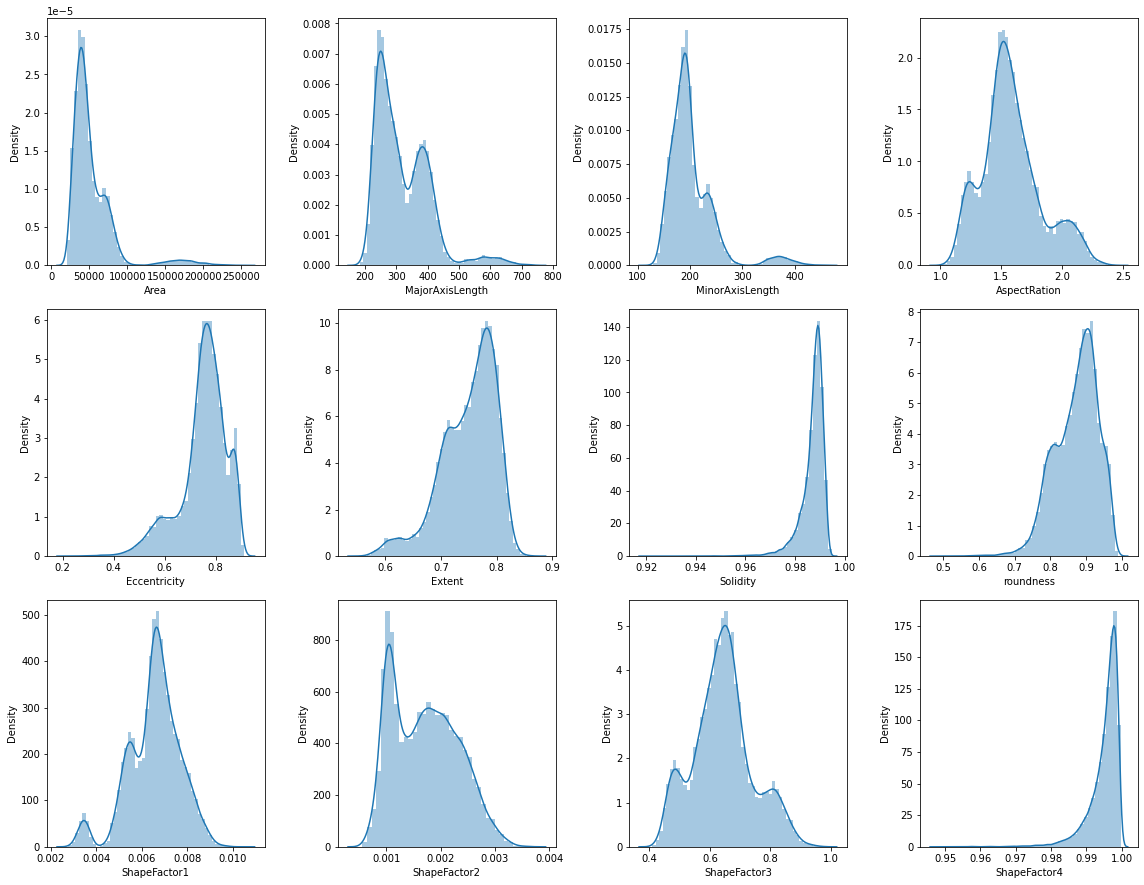

In [13]:
cols = ['Area', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'Extent',
       'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

plt.figure(figsize=(16,16))
for (i,j) in enumerate(cols):
    plt.subplot(4,4,i+1)
    sns.distplot(data[j] , kde=True)
    
    
plt.tight_layout()

There are some skewed distribution. The most skewed distributions appearing are
1. Solidity
2. Area
3. ShapeFactor4

We'll apply transformations to these two columns. We'll apply np.log transform

In [14]:
data['Solidity'] = np.log(1 - data['Solidity'])
data['Area'] = np.log(data['Area'])
data['ShapeFactor4'] = np.log(1 - data['ShapeFactor4'])

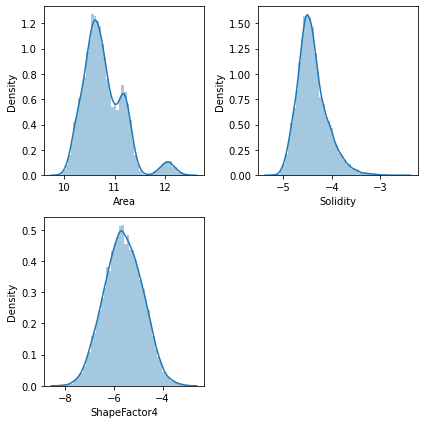

In [15]:
cols = ['Area','Solidity','ShapeFactor4']

plt.figure(figsize=(6,6))
for (i,j) in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.distplot(data[j] , kde=True)
    
    
plt.tight_layout()

**Splitting data into train and test**

In [16]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

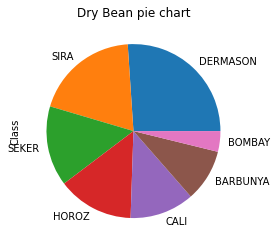

In [17]:
# Pie chart for different beans
pie_chart = data["Class"].value_counts(normalize=True)
pie_chart.plot.pie()
plt.title("Dry Bean pie chart")
plt.show()

**Insights**

There is an imbalance . So we cannot do random split, We'll do **StratifiedSplit()** to ensure distribution is same in splits

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
X = data.drop('Class',axis=1)
y = data['Class']
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0) #test size of 10% 

for train_index, test_index in sss.split(X , y):
    
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

In [19]:
y_train.value_counts()

DERMASON    3191
SIRA        2372
SEKER       1824
HOROZ       1735
CALI        1467
BARBUNYA    1190
BOMBAY       470
Name: Class, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_tf = scaler.transform(X_train)

In [21]:
df = pd.DataFrame(X_train_tf , columns=X_train.columns)
df.head()    ##checking how scaled data is looking

Area  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4
0 -0.015190         0.251545  ...     -1.237474     -0.143684
1  1.434394         1.417430  ...     -0.787039      1.209403
2 -0.910003        -0.708537  ...     -0.181201     -0.881471
3  1.002662         0.769598  ...     -0.240971     -0.337334
4 -0.312250        -0.628456  ...      1.163725     -0.985164

[5 rows x 12 columns]

#**Applying different models and Hyper Parameter Tuning**
1. Support Vector Classifier
In our case the number of features(n) (12) <<< number of datapoints(m) (around 12,000 in train data), and in these cases SVC is known to have good performance.

2. K Nearest Neighbor Classifier
a quick algorithm as it does not derive any discriminative function from training data

In [22]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Now we need to split the data into train set and cross validation set. We will train the model on train set and test it on validation set and based on that we need to adjust the hyper parameters of the algorithm used.

Here also we need to ensure that the distribution between train and validation set is stratified one

Now dividing the data set into train and valid set (stratified distribution) and performing hyper parameter tuning will be done by sklearn's **GridSearchCV()** function

We are making a dictionary which contains the name of model and its parameter grid which will be fed to the GridSearchCV() function

In [36]:
model_params = {
    'svc': {
        'model': SVC(),
        'parameters': {
            'C':[1 ,10],
            'kernel':['rbf' , 'linear'],
            'gamma': ['scale' , 'auto' , 0.5]           
        }
    }
}

In [37]:
scores = []      # to store the score and best parameters of different models
from sklearn.model_selection import GridSearchCV

classifier = GridSearchCV(
        estimator = model_params['svc']['model'],
        param_grid = model_params['svc']['parameters'],
        cv = 10,    # cv = 10, train data divided into 10 parts, 9 parts will be used for training the model and 1 part will be to calculate the cross validation error
        return_train_score = True
        )
classifier.fit(X_train_tf,y_train)


scores.append({
        'model': 'svc',
        'best_score':classifier.best_score_,
        'best_params':classifier.best_params_})
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])  # making a dataframe for better visualization

In [38]:
df

model  best_score                                   best_params
0   svc    0.931668  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

The ideal value of n_neighbors is calculated by looking at the decrease in loss and finding the elbow point. For KNN we'll see the decrease in loss with increasing number of neighbours.

In [39]:
from sklearn.model_selection import cross_val_score
accuracy = []
for i in np.arange(1,12):
    
    model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(model, X_train_tf, y_train, scoring="accuracy", cv=10)  # StratifiedKFold CV is being done
    accuracy.append(scores.mean())  # we'll store the average value of accuracy calculated over all the 10 CV sets

([<matplotlib.axis.XTick at 0x7f1d2ac33f90>,
 <a list of 11 Text major ticklabel objects>)

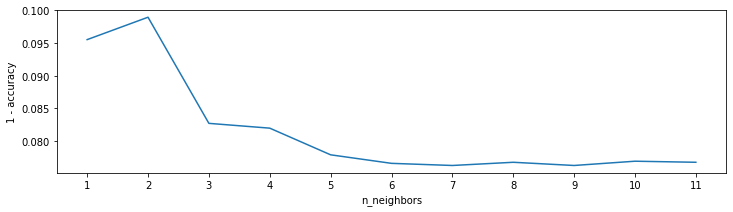

In [40]:
%matplotlib inline
plt.figure(figsize=(12,3))
accuracy = np.array(accuracy)
plt.plot(np.arange(1,12) , 1-accuracy) 
plt.xlabel("n_neighbors")
plt.ylabel("1 - accuracy")
plt.xticks(np.arange(1,12))

**Insight**

On seeing the graph ,we can conlcude that n_neighbors = 5 will be a good estimate as error is low and moreover there is not much decrease in error on increasing n_neighbors from 5

Storing all the best parameters in a DataFrame

In [53]:
knn_eval = {
    'model': 'knn',
    'best_score':accuracy[7],
    'best_params': 'n_neighbors: 6'
    
}
df = df.append(knn_eval ,ignore_index=True)     # appending the best params of KNN to our dataframe

In [54]:
df

model  best_score                                   best_params
0   svc    0.931668  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
1   knn    0.923422                                n_neighbors: 5
2   knn    0.923749                                n_neighbors: 6
3   knn    0.923259                                n_neighbors: 6

So based on the analysis it is visible that Support Vector Classifier ( C = 10 , gamma = scale, kernel = rbf) has a better performace than KNN algorithm

#**Post training analysis**


We will train the models as per the hyper parameters we got before and we will keep track of

Train Time

Test Time

Test accuracy

Classification Report

Confusion Matrix

Then we will combine these with the train accuracy of models calculated above and do an analysis of all the models

In [43]:
from sklearn.metrics import classification_report,accuracy_score
import time
svc = SVC(C=10 , gamma='scale' , kernel='rbf')
knn = KNeighborsClassifier(n_neighbors=5)
scores_final = []

model_list = [svc , knn]
model_dict = {svc : "Support Vector Classifier" ,knn : "K Nearest Classifier"}
predict = []

for model in model_list:
    print("Model name ", model_dict[model])  
    
    start_time = time.time()                       #tracking train time
    model.fit(X_train_tf , y_train)
    end_time = time.time()

    train_duration = end_time - start_time
    print("Time to train: ",train_duration,'\n')
    
    start_time = time.time()                       #tracking test time
    predictions = model.predict(scaler.transform(X_test))  ## the values of mean and variance calculated from train data will 
                                                           ##used to transform test data
  
    
    end_time = time.time()
    predict.append(predictions)
    test_duration = end_time - start_time
    print("Time to test: ",test_duration,'\n')
    
    
                                                     
    print(classification_report(y_test,predictions))      ## printing the classification report
    print('Exact Accuracy:' , accuracy_score(y_test , predictions))
    print('\n\n')
    
    
    scores_final.append({                                 ## appending the values in a dataset for further analysis
        "model_name ":model_dict[model],
        "exact accuracy": accuracy_score(y_test , predictions),
        "train_time":train_duration,
        "test_time":test_duration
    })

Model name  Support Vector Classifier
Time to train:  1.26759672164917 

Time to test:  0.24235320091247559 

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.93      0.95       132
      BOMBAY       1.00      1.00      1.00        52
        CALI       0.95      0.98      0.96       163
    DERMASON       0.91      0.95      0.93       355
       HOROZ       0.99      0.93      0.96       193
       SEKER       0.97      0.96      0.97       203
        SIRA       0.89      0.88      0.89       264

    accuracy                           0.94      1362
   macro avg       0.95      0.95      0.95      1362
weighted avg       0.94      0.94      0.94      1362

Exact Accuracy: 0.9375917767988252



Model name  K Nearest Classifier
Time to train:  0.034749507904052734 

Time to test:  0.08659863471984863 

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.91      0.94       132
      BOMBAY       1.00      1.00    

In [44]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
SVM_matrix = confusion_matrix(y_test, predict[0])

In [45]:
SVM_matrix

array([[123,   0,   5,   0,   1,   0,   3],
       [  0,  52,   0,   0,   0,   0,   0],
       [  3,   0, 159,   0,   1,   0,   0],
       [  0,   0,   0, 336,   0,   3,  16],
       [  0,   0,   4,   2, 179,   0,   8],
       [  0,   0,   0,   6,   0, 195,   2],
       [  1,   0,   0,  27,   0,   3, 233]])

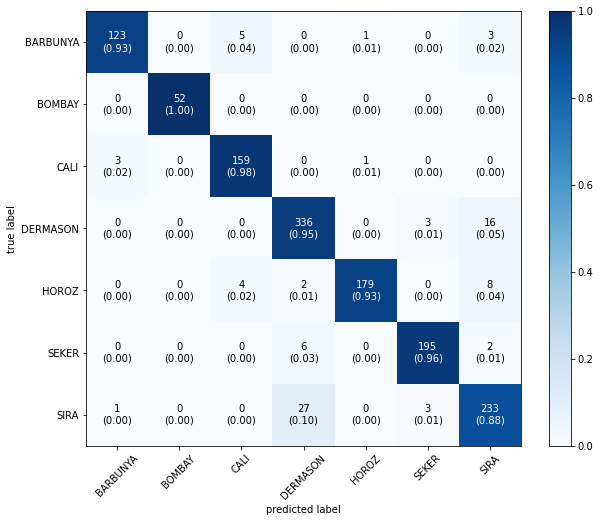

In [59]:
#figure(figsize=(10, 12), dpi=80)
class_name= ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
fig, ax = plot_confusion_matrix(conf_mat=SVM_matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,figsize=(10, 8),
                                class_names = class_name)
plt.show()

In [60]:
KNN_matrix = confusion_matrix(y_test, predict[1])

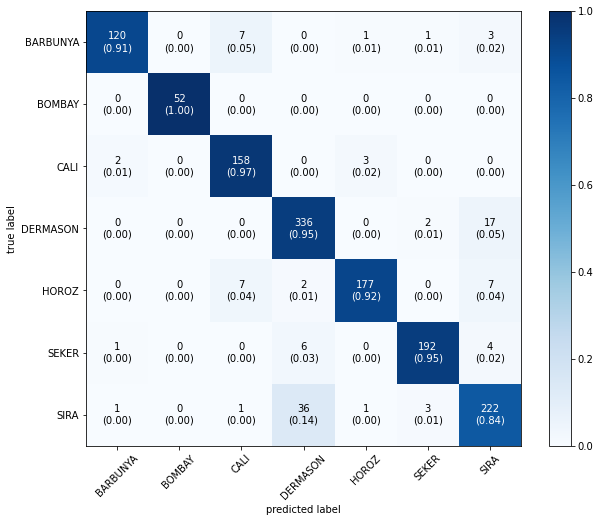

In [61]:

fig, ax = plot_confusion_matrix(conf_mat=KNN_matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,figsize=(10, 8),
                                class_names=class_name)
plt.show()

In [49]:
final_df = pd.DataFrame(scores_final)
final_df = pd.concat([final_df['model_name '] , df['best_score'] , final_df['exact accuracy'] , final_df['train_time']
           ,final_df['test_time']] ,axis=1)
final_df.columns = ['model_name','train_accuracy', 'test_accuracy', 'train_time', 'test_time']

# combining the train scores from df and then some re-arranging to make things look nicer

In [50]:
final_df

model_name  train_accuracy  ...  train_time  test_time
0  Support Vector Classifier        0.931668  ...    1.267597   0.242353
1       K Nearest Classifier        0.923422  ...    0.034750   0.086599

[2 rows x 5 columns]

#**Analysis**


We see that Support Vector Classifier(SVC) is having the highest train and test accuracy.


We also see that KNN hardly takes time to train , that is because it is a simpler algorithm it does not learn any parameter from dataset. As it is a small dataset, KNN is doing calculations fast, however if it was a very big dataset, then it would have been slow as in that case many distances need to be calculated.

In the end SVC() is better among these two models, considering in terms of accuracy, and KNN model will be preffered in case of training time is highest priority.

Note It can be seen that some algorithms are having a better performance on test data than on train data. This is only by chance.One possible reason can be the use of StratifiedShuffleSplit() where algorithms were given same distributions in train and test sets.

#**Summary**


We had a dataset of Dry beans and based on its features we had to predict whether its class is BARBUNYA , BOMBAY, CALI, DERMASON, HOROZ, SEKER or SIRA.

Firstly we analyzed the data and tried to get a general understanding of it by seeing how many datapoints are there, what features etc. Then we tried to see some interaction between features and tried to filter out what features are relevant and what are not.

Then we splitted the data into train and test set and applied 2 models on train data (which was further divided into train and cross validation data while performing GridSearchCV() ) and tuned the hyperparameters.

Then we did the post train analysis of different models and found the train accuracy, test accuracy, train time, test time correspondingly.

**Future Improvemnets**

Transforming the density plot of different features into the same distribution may performed better.

More feature selction analysis may give better results. 